In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

ModuleNotFoundError: No module named 'pandas'

In [ ]:
data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# print(pd.unique(data['PassengerId'])) gives all unique values in this 
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
data.drop('PassengerId', axis = 1, inplace = True)

In [ ]:
data.drop("Name", axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [ ]:
data['Survived'] = data['Survived'].astype(str)

<Axes: xlabel='Survived', ylabel='Fare'>

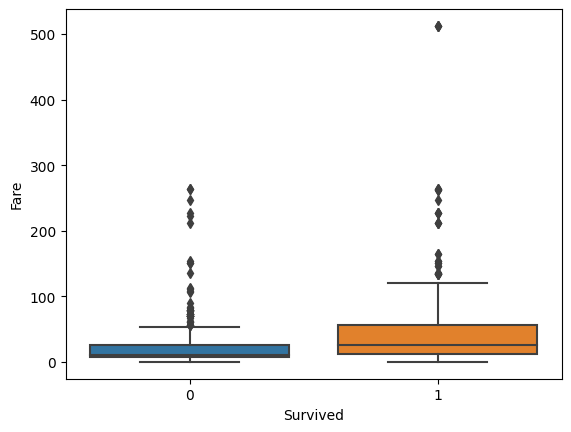

In [ ]:
xaxis=data["Survived"]
yaxis=data["Fare"]

sns.boxplot(x=xaxis,y=yaxis,data=data)

In [ ]:
data.drop('Fare',axis=1,inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,NaN,S
1,1,1,female,38.0,1,0,PC 17599,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S
3,1,1,female,35.0,1,0,113803,C123,S
4,0,3,male,35.0,0,0,373450,NaN,S


In [ ]:
print(pd.unique(data['Pclass']))

[3 1 2]


In [ ]:
print(pd.unique(data['SibSp']))

[1 0 3 4 2 5 8]


In [ ]:
print(pd.unique(data['Parch']))

[0 1 2 5 3 4 6]


In [ ]:
data['Cabin'].isnull().sum()

687

In [ ]:
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
data.drop('Ticket', axis=1, inplace=True)

In [ ]:
sex_mapping = {"male":0, "female":1}

data["Sex"]=data["Sex"].map({"male":0,
                            "female":1})

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,S
1,1,1,1,38.0,1,0,C
2,1,3,1,26.0,0,0,S
3,1,1,1,35.0,1,0,S
4,0,3,0,35.0,0,0,S


In [ ]:
print(pd.unique(data["Embarked"]))

['S' 'C' 'Q' nan]


In [ ]:
data["Embarked"]=data["Embarked"].map({"S":0,
                                      "C":1,
                                      "Q":2})

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
data["Embarked"]=imputer.fit_transform(data[["Embarked"]])

In [ ]:
print(data.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64


In [ ]:
data['Age']=imputer.fit_transform(data[["Age"]])

In [ ]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.338481,0.543351,-0.052872,-0.035322,0.081629,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.356187,0.083081,0.018443,0.045702
Sex,0.543351,-0.131900,1.000000,-0.073377,0.114631,0.245489,0.116569
Age,-0.052872,-0.356187,-0.073377,1.000000,-0.232411,-0.155118,-0.047625
SibSp,-0.035322,0.083081,0.114631,-0.232411,1.000000,0.414838,-0.059961
Parch,0.081629,0.018443,0.245489,-0.155118,0.414838,1.000000,-0.078665
Embarked,0.106811,0.045702,0.116569,-0.047625,-0.059961,-0.078665,1.000000


In [ ]:
print(pd.unique(data["Embarked"]))

[0. 1. 2.]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [ ]:
data["Survived"]=data["Survived"].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
y=data['Survived']
x=data.drop("Survived",axis=1)
z=data['Survived']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.01, random_state=42)



In [ ]:
model = LogisticRegression()

model.fit(x,y)

# y_pred = model.predict(X_test)

# r2 = r2_score(y_test, y_pred)
# print(f'R-squared score: {r2}')

# accuracy = accuracy_score(y_test, y_pred) * 100
# print(f'Accuracy: {accuracy}%')

LogisticRegression()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000)  # Adjust max_iter based on convergence
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {acc:.2f}')

Logistic Regression: Accuracy = 0.89
Decision Tree: Accuracy = 0.78
Random Forest: Accuracy = 0.78
Gradient Boosting: Accuracy = 0.89
AdaBoost: Accuracy = 0.89
SVM: Accuracy = 0.44
K-Nearest Neighbors: Accuracy = 0.89
Naive Bayes: Accuracy = 0.89
Neural Network: Accuracy = 0.89


In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf


# Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Build the deep learning model
# model = Sequential()

# model.add(Dense(units=32, activation='relu', input_dim=1))
# model.add(Dense(units=16, activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# You can also evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.2f}')


2024-04-24 06:41:40.878297: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 06:41:40.878422: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 06:41:41.027114: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5947 - loss: 0.6656
Epoch 2/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7290 - loss: 0.5488
Epoch 3/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7894 - loss: 0.4926
Epoch 4/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8160 - loss: 0.4724
Epoch 5/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8121 - loss: 0.4373
Epoch 6/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7947 - loss: 0.4572
Epoch 7/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8346 - loss: 0.4215
Epoch 8/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8020 - loss: 0.4399
Epoch 9/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7972 - loss: 0.4599
Epoch 10/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8118 - loss: 0.4178
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Accuracy: 0.89
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8188 - loss: 0.4093  
Training Ac